## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = './data/planet/'

In [4]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [5]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [8]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg',bs=64)

In [9]:
data = get_data(256)

In [19]:
sz=64

In [20]:
data = get_data(sz)

In [22]:
data = data.resize(int(sz*1.3), 'tmp')

In [10]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2                          
    0      0.214879   0.315971   0.781487  



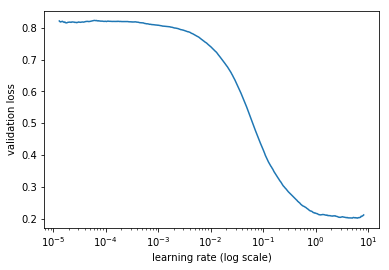

In [24]:
lrf=learn.lr_find()
learn.sched.plot()

In [11]:
lr = 0.2

In [26]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.147772   0.132413   0.883775  
    1      0.144032   0.128486   0.885778                    
    2      0.140724   0.125692   0.890952                    
    3      0.140423   0.12462    0.891932                    
    4      0.135377   0.123474   0.890289                    
    5      0.134256   0.121458   0.894902                    
    6      0.131391   0.121249   0.894589                    



[array([0.12125]), 0.8945892896394227]

In [ ]:
## dont check lr after freezed weights have been trained

epoch      trn_loss   val_loss   f2                          
    0      0.188946   0.26216    0.818276  



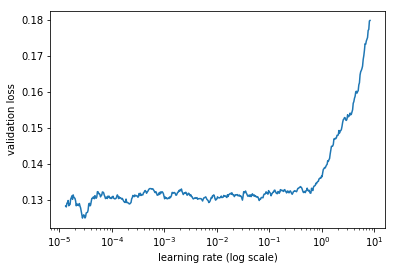

In [27]:
lrf=learn.lr_find()
learn.sched.plot()

In [28]:
learn.save(f'1-{sz}')

In [29]:
learn.fit(lr, 2, cycle_len=2, cycle_mult=1)

epoch      trn_loss   val_loss   f2                          
    0      0.134011   0.121331   0.893266  
    1      0.129556   0.120766   0.893729                    
    2      0.130658   0.120419   0.896307                    
    3      0.129273   0.119826   0.89532                     



[array([0.11983]), 0.8953201076921635]

In [30]:
learn.save(f'2-{sz}')

In [12]:
lrs = np.array([lr/9,lr/3,lr])

In [32]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=2, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.122055   0.107929   0.907005  
    1      0.11739    0.10287    0.91338                     
    2      0.113669   0.103432   0.911254                    
    3      0.111365   0.100239   0.915319                    
    4      0.099566   0.097557   0.916912                     
    5      0.099468   0.096381   0.919463                     
    6      0.10696    0.102132   0.912817                    
    7      0.104314   0.100374   0.916724                    
    8      0.100658   0.099461   0.91586                      
    9      0.098229   0.096686   0.918658                     
    10     0.097023   0.09635    0.918941                     
    11     0.091764   0.095067   0.920522                     
    12     0.09087    0.094676   0.921416                     
    13     0.088718   0.094691   0.921432                     



[array([0.09469]), 0.9214317668679112]

In [33]:
learn.save(f'3-{sz}')

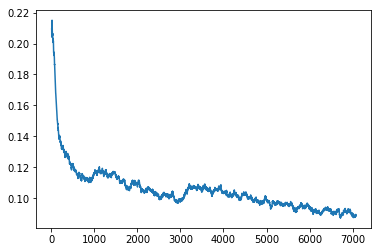

In [34]:
learn.sched.plot_loss()

In [35]:
sz=128

In [36]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   f2                           
    0      0.097258   0.094271   0.91831   
    1      0.095846   0.09308    0.919917                     
    2      0.093359   0.091569   0.921645                     



[array([0.09157]), 0.9216447053088228]

In [37]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=2, cycle_mult=2)
learn.save(f'4-{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.093314   0.08633    0.927546  
    1      0.088846   0.084782   0.928652                     
    2      0.092167   0.088548   0.925531                     
    3      0.087047   0.085862   0.927817                     
    4      0.083805   0.08371    0.930211                     
    5      0.082314   0.083424   0.929834                     
    6      0.088683   0.086333   0.929191                     
    7      0.087666   0.087068   0.927324                     
    8      0.083169   0.084379   0.930522                     
    9      0.085758   0.085677   0.92973                      
    10     0.078272   0.085149   0.929736                     
    11     0.076931   0.084224   0.93024                      
    12     0.076154   0.084087   0.930653                     
    13     0.076314   0.084163   0.931301                     



In [13]:
sz=256

In [14]:
learn.set_data(get_data(sz))

In [39]:
learn.freeze()
learn.fit(lr, 1, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   f2                           
    0      0.087896   0.087513   0.9267    



[array([0.08751]), 0.9267002838497653]

In [40]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.088089   0.087069   0.927217  
    1      0.086625   0.086425   0.927849                     
    2      0.085131   0.086051   0.928689                     
    3      0.086125   0.087025   0.926034                     
    4      0.086617   0.08589    0.92819                      
    5      0.081104   0.08552    0.92807                      
    6      0.085387   0.085685   0.928498                     



[array([0.08568]), 0.9284981853170737]

In [42]:
learn.fit(lr, 1, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   f2                           
    0      0.085218   0.085769   0.927787  



[array([0.08577]), 0.9277870842177839]

In [44]:
learn.save(f'{sz}-1')

In [15]:
learn.load(f'{sz}-2')

In [15]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}-2')

epoch      trn_loss   val_loss   f2                           
    0      0.085782   0.082319   0.932115  
    1      0.085944   0.083135   0.93271                      
    2      0.082525   0.081343   0.934083                     
    3      0.085741   0.084237   0.931812                     
    4      0.083294   0.082915   0.930983                     
    5      0.079052   0.081162   0.93384                      
    6      0.07427    0.081219   0.933408                     



In [34]:
learn.fit(lrs, 3, cycle_len=2, cycle_mult=1)

epoch      trn_loss   val_loss   f2                           
    0      0.07984    0.082426   0.932912  
    1      0.074232   0.081073   0.93404                      
    2      0.079458   0.083275   0.932047                     
    3      0.073174   0.081631   0.933048                     
    4      0.079519   0.083515   0.931941                     
    5      0.073886   0.082289   0.931649                     



[array([0.08229]), 0.9316486289989976]

In [35]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [36]:
f2(preds,y)

0.9313357953854853

In [37]:
_preds = learn.predict()

In [16]:
mult,_y = learn.TTA(is_test=True)
pred_ = np.mean(mult,0)

In [17]:
cls = learn.data.classes

nmes = [x.split('.')[0].split('/')[-1] for x in learn.data.test_dl.dataset.fnames]

idx_to_cls = {}
for i in range(len(cls)):
    idx_to_cls[i] = cls[i]

In [24]:
lbls = []
for i in range(pred_.shape[0]):
    idxs = (pred_[i]>0.2).nonzero()[0]
    lbl = ''
    for idx in idxs:
        lbl = lbl+idx_to_cls[idx]+' '
    lbls.append(lbl[:-1])

In [ ]:
lbls

In [19]:
pred_[0]

array([0.01587, 0.00056, 0.00073, 0.00032, 0.00038, 0.01252, 0.8146 , 0.00024, 0.00232, 0.00155, 0.0141 ,
       0.0763 , 0.20366, 0.02218, 0.00019, 0.00024, 0.05464], dtype=float32)

In [27]:
s = {'image_name':nmes,'tags':lbls}
s_ = pd.DataFrame(s)
s_.to_csv('./sub1-2.csv',index=False)

In [21]:
from IPython.display import FileLink

In [28]:
FileLink('./sub1-2.csv')

/home/lilhope/Downloads/fastai/courses/dl1/sub1-2.csv

In [95]:
!ls ./data/planet/test-jpg/|wc -l

40669
